<a href="https://colab.research.google.com/github/rivo1982/clase_ml_2025/blob/main/Optimizaci%C3%B3n_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **N7: Optimización Lineal I: Conceptos Fundamentales**

# Optimización Lineal en Análisis de Negocios: Ejemplo de Producción

Una empresa debe decidir cuántas unidades producir de dos productos ($𝑥$, $𝑦$ ):

- Una empresa necesita decidir cuántas unidades producir de dos productos, $𝑥$ y $𝑦$, para maximizar sus ganancias. Cada unidad del producto $𝑥$ genera $5$ de ganancia. Cada unidad del producto $𝑦$ genera $3$ de ganancia. Además, la empresa tiene costos fijos de $100$. La producción está limitada por restricciones de recursos $100$ ud., cuando el producto $𝑥$ necesita $2$ unidades de recurso e $𝑦$ necesita $3$ unidades de recursos para su producción. Además, solo se posee una capacidad de almacenamiento de $200$ ud.


## 1. **Variables de decisión**
- \( x \) = cantidad de unidades a producir del producto A.
- \( y \) = cantidad de unidades a producir del producto B.

## 2. **Función objetivo**
- Es **lo que queremos maximizar** (o minimizar).
- Aquí: **Maximizar Ganancias**.
- Función objetivo:

 $  \text{Ganancias Totales} = 5x + 3y$

  Donde:
  - 5 = ganancia por unidad de producto A.
  - 3 = ganancia por unidad de producto B.

In [ ]:
# Importar librerías necesarias
import numpy as np  # Para trabajar con arreglos y funciones matemáticas
import matplotlib.pyplot as plt  # Para graficar
from scipy.optimize import linprog  # Para resolver el problema de optimización lineal



# Definir la función objetivo: maximizar Z = 5x + 3y - 100
# Nota: linprog siempre minimiza, así que cambiamos el signo de 5 y 3 (ignoramos el -100 porque es constante)
c = [-5, -3]

## 3. **Costos Fijos**
- Representan gastos constantes que no dependen de la cantidad producida:

$  \text{Costos Fijos} = 100$

- La **ganancia neta** (beneficio real) sería:

$  \text{Ganancia Neta} = (5x + 3y) - 100 $


## 4. **Restricciones**
Las soluciones no pueden ser cualquier combinación de $( x )$ e $( y )$. Existen **limitaciones** que deben cumplirse.

  
  a) **Disponibilidad de recursos**:

$ 2x + 3y \leq 100 $
  
  (por ejemplo, $100$ horas disponibles de trabajo).

  b) **Capacidad de almacenamiento**:

$  x + y \leq 200$

  (no se pueden almacenar más de $200$ unidades en total).

  c) **No producción negativa**:

$  x \geq 0, \quad y \geq 0$

  (no tiene sentido producir cantidades negativas).

In [ ]:
# Definir la matriz de coeficientes de las restricciones (lado izquierdo de las desigualdades)
# Cada fila corresponde a una restricción
A = [[2, 3], [1, 1]]

# Definir el vector del lado derecho de las restricciones
b = [100, 200]

# Definir los límites de las variables de decisión (x >= 0, y >= 0)
x_bounds = (0, None)
y_bounds = (0, None)


## 5. **Solución óptima**
- Se determina **cuántas unidades de cada producto** conviene producir para **maximizar las ganancias netas** sin violar las restricciones.


In [ ]:
# Resolver el problema de programación lineal utilizando el método 'highs'
res = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

# Obtener los valores óptimos de x e y
x_opt, y_opt = res.x
print(x_opt)


50.0




## 6. **Variables de resultado**
- Son los valores que se calculan **una vez resuelto** el problema:
  - **Cantidad óptima** de \( x \) e \( y \).
  - **Ganancia total óptima** obtenida.




In [ ]:
# Calcular la ganancia neta (considerando el -100 en la función objetivo)
z_opt = 5*x_opt + 3*y_opt - 100
print(z_opt)

150.0


### **5. Representación gráfica del problema I**

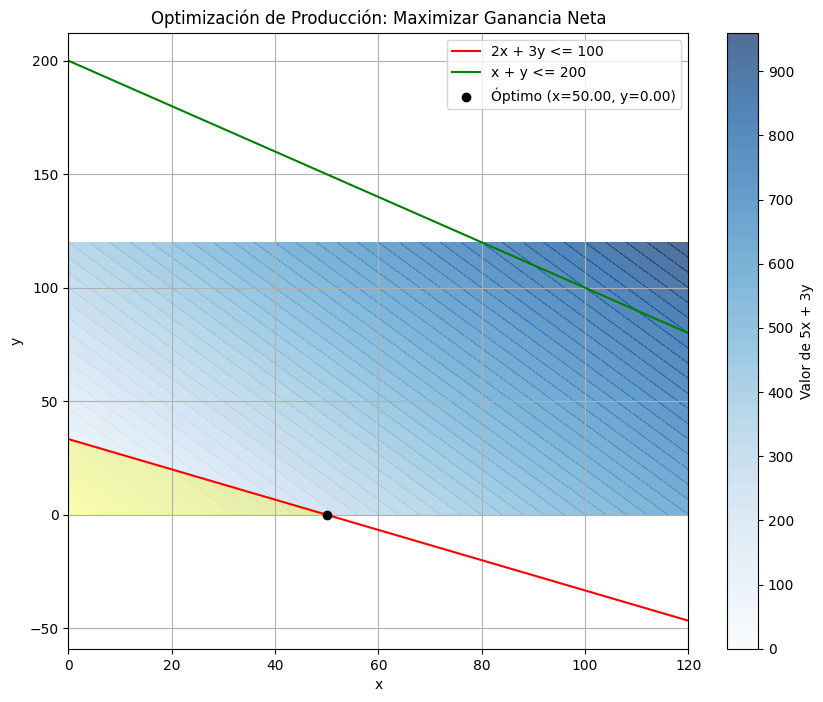

Producción óptima: x = 50.00, y = 0.00
Ganancia neta óptima: Z = 150.00


In [ ]:
# Importar librerías necesarias
import numpy as np  # Para trabajar con arreglos y funciones matemáticas
import matplotlib.pyplot as plt  # Para graficar
from scipy.optimize import linprog  # Para resolver el problema de optimización lineal

# Definir la función objetivo: maximizar Z = 5x + 3y - 100
# Nota: linprog siempre minimiza, así que cambiamos el signo de 5 y 3 (ignoramos el -100 porque es constante)
c = [-5, -3]

# Definir la matriz de coeficientes de las restricciones (lado izquierdo de las desigualdades)
# Cada fila corresponde a una restricción
A = [[2, 3], [1, 1]]

# Definir el vector del lado derecho de las restricciones
b = [100, 200]

# Definir los límites de las variables de decisión (x >= 0, y >= 0)
x_bounds = (0, None)
y_bounds = (0, None)

# Resolver el problema de programación lineal utilizando el método 'highs'
res = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

# Obtener los valores óptimos de x e y
x_opt, y_opt = res.x

# Calcular la ganancia neta (considerando el -100 en la función objetivo)
z_opt = 5*x_opt + 3*y_opt - 100

# Crear un rango de valores para x y y para graficar
x_values = np.linspace(0, 120, 400)
y_values = np.linspace(0, 120, 400)

# Crear una malla de coordenadas a partir de los valores de x e y
X, Y = np.meshgrid(x_values, y_values)

# Evaluar la función objetivo en cada punto de la malla (sin restar 100 para el gráfico)
Z = 5*X + 3*Y

# Crear una figura para el gráfico
plt.figure(figsize=(10, 8))

# Dibujar el mapa de contornos de la función objetivo
plt.contourf(X, Y, Z, levels=50, cmap='Blues', alpha=0.7)
plt.colorbar(label='Valor de 5x + 3y')

# Dibujar la primera restricción: 2x + 3y <= 100
plt.plot(x_values, (100 - 2*x_values)/3, label='2x + 3y <= 100', color='red')

# Dibujar la segunda restricción: x + y <= 200
plt.plot(x_values, 200 - x_values, label='x + y <= 200', color='green')

# Rellenar la región factible (manual y simplificada)
plt.fill_between(x_values, 0, np.minimum((100 - 2*x_values)/3, 200 - x_values), where=(np.minimum((100 - 2*x_values)/3, 200 - x_values)) >= 0, color='yellow', alpha=0.3)

# Dibujar el punto óptimo
plt.scatter(x_opt, y_opt, color='black', label=f'Óptimo (x={x_opt:.2f}, y={y_opt:.2f})', zorder=5)

# Etiquetas de los ejes
plt.xlabel('x')
plt.ylabel('y')

# Título del gráfico
plt.title('Optimización de Producción: Maximizar Ganancia Neta')

# Agregar leyenda
plt.legend()

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.show()

# Imprimir resultados óptimos
print(f'Producción óptima: x = {x_opt:.2f}, y = {y_opt:.2f}')
print(f'Ganancia neta óptima: Z = {z_opt:.2f}')


### **Representación gráfica del problema II**

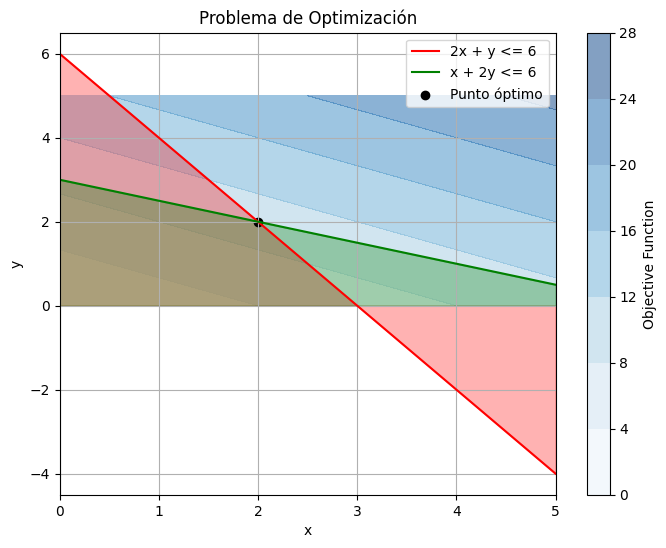

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Función objetivo: maximizar z = 2x + 3y
c = [-2, -3]

# Restricciones: 2x + y <= 6, x + 2y <= 6
A = [[2, 1], [1, 2]]
b = [6, 6]

# Definir los límites de las variables de decisión (x >= 0, y >= 0)
x_bounds = (0, None)
y_bounds = (0, None)

# Resolver el problema de optimización lineal
res = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

# Coordenadas del punto óptimo
x_opt, y_opt = res.x

# Definir los límites del gráfico
x_values = np.linspace(0, 5, 100)
y_values = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x_values, y_values)
Z = 2*X + 3*Y

# Graficar la función objetivo y las restricciones
plt.figure(figsize=(8, 6))

# Contorno de la función objetivo
plt.contourf(X, Y, Z, cmap='Blues', alpha=0.5)
plt.colorbar(label='Objective Function')

# Restricciones
plt.plot(x_values, 6 - 2*x_values, label='2x + y <= 6', color='red')
plt.plot(x_values, (6 - x_values)/2, label='x + 2y <= 6', color='green')
plt.fill_between(x_values, 0, 6 - 2*x_values, color='red', alpha=0.3)
plt.fill_between(x_values, 0, (6 - x_values)/2, color='green', alpha=0.3)

# Punto óptimo
plt.scatter(x_opt, y_opt, color='black', label='Punto óptimo')

# Etiquetas y leyendas
plt.xlabel('x')
plt.ylabel('y')
plt.title('Problema de Optimización')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()


- En esta visualización, la función objetivo se muestra como un mapa de calor en el fondo, donde los tonos de azul más oscuros representan valores más altos de la función objetivo y los tonos más claros representan valores más bajos. El objetivo es maximizar esta función.

- Las líneas roja y verde representan las restricciones del problema. Por ejemplo, la línea roja ($2x + y \leq 6$) y la línea verde ($x + 2y \leq 6$). Las áreas sombreadas por debajo de estas líneas indican dónde se cumplen las restricciones.

- La solución óptima del problema se encuentra en la región donde todas las restricciones se cumplen simultáneamente, es decir, en el área sombreada que está dentro de las líneas roja y verde. Este punto óptimo se determina al encontrar el punto dentro de esta región que maximiza la función objetivo.

- Esta visualización permite entender intuitivamente cómo las restricciones limitan el espacio de búsqueda de la solución óptima, y cómo la función objetivo guía hacia el punto óptimo dentro de esa región factible.
